In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Data Import

In [62]:
dictionary= pd.read_csv('data/data_dictionary.csv')
dictionary

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order
8,order_items,order_item_id,Unique identifier for each order item (PK)
9,order_items,created_at,Timestamp when the order was placed


In [63]:
product_info=pd.read_csv('data/products.csv')
product_info

,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear
2,3,2013-12-12 09:00:00,The Birthday Sugar Panda
3,4,2014-02-05 10:00:00,The Hudson River Mini bear


### EDA

In [64]:
product_info.dtypes

product_id       int64
created_at      object
product_name    object
dtype: object

In [65]:
orders= pd.read_csv('data/orders.csv') 
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [66]:
orders.columns

Index(['order_id', 'created_at', 'website_session_id', 'user_id',
       'primary_product_id', 'items_purchased', 'price_usd', 'cogs_usd'],
      dtype='object')

In [67]:
orders.isnull().sum()

order_id              0
created_at            0
website_session_id    0
user_id               0
primary_product_id    0
items_purchased       0
price_usd             0
cogs_usd              0
dtype: int64

In [68]:
orders.dtypes

order_id                int64
created_at             object
website_session_id      int64
user_id                 int64
primary_product_id      int64
items_purchased         int64
price_usd             float64
cogs_usd              float64
dtype: object

In [69]:
sales=orders["price_usd"].sum()
sales

np.float64(1938509.75)

In [70]:
average_order_value = orders["price_usd"].mean()
average_order_value

np.float64(59.99163649305233)

In [71]:
order_items= pd.read_csv('data/order_items.csv')
order_items

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49
...,...,...,...,...,...,...,...
40020,40021,2015-03-19 04:10:43,32310,4,1,29.99,9.49
40021,40022,2015-03-19 05:27:28,32311,2,1,59.99,22.49
40022,40023,2015-03-19 05:27:28,32311,4,0,29.99,9.49
40023,40024,2015-03-19 05:35:57,32312,4,1,29.99,9.49


In [72]:
order_items.columns

Index(['order_item_id', 'created_at', 'order_id', 'product_id',
       'is_primary_item', 'price_usd', 'cogs_usd'],
      dtype='object')

In [73]:
order_items.isnull().sum()

order_item_id      0
created_at         0
order_id           0
product_id         0
is_primary_item    0
price_usd          0
cogs_usd           0
dtype: int64

In [74]:
order_items.dtypes

order_item_id        int64
created_at          object
order_id             int64
product_id           int64
is_primary_item      int64
price_usd          float64
cogs_usd           float64
dtype: object

#### Total Orders

In [75]:
total_orders=order_items.order_item_id.nunique()
total_orders

40025

### Units Sold Per Product

In [76]:
product_sales =order_items.groupby("product_id").size().reset_index(name="total_units_sold").sort_values("total_units_sold", ascending=False)
product_sales

,product_id,total_units_sold
0,1,24226
1,2,5796
3,4,5018
2,3,4985


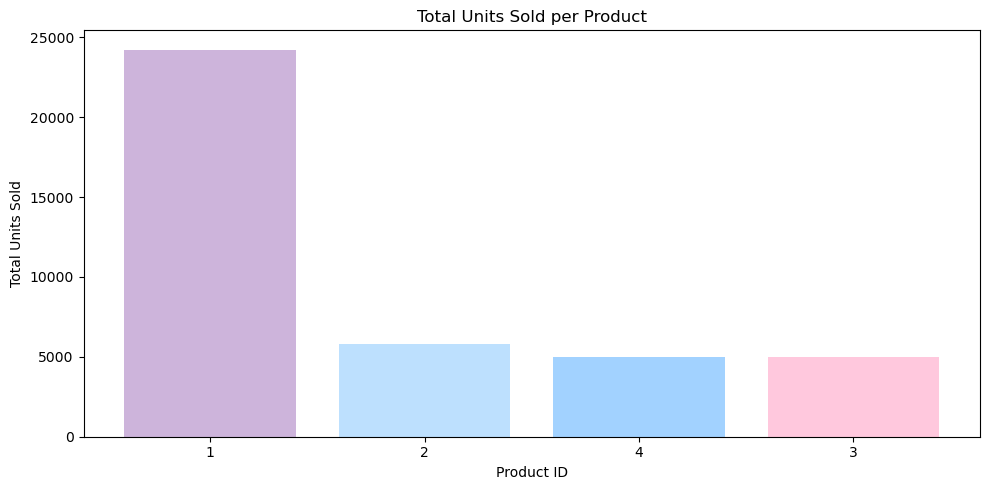

In [77]:
import matplotlib.pyplot as plt

product_sales = (
    order_items.groupby("product_id")
    .size()
    .reset_index(name="total_units_sold")
    .sort_values("total_units_sold", ascending=False)
)

plt.figure(figsize=(10,5))
plt.bar(product_sales["product_id"].astype(str),
        product_sales["total_units_sold"],
        color=['#cdb4db','#bde0fe','#a2d2ff','#ffc8dd'])

plt.xlabel("Product ID")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold per Product")
plt.tight_layout()
plt.show()

- Product 1 significantly outperforms all other products in terms of sales.

- Products 2, 3, and 4 show comparable sales levels, but far below Product 1.

- A substantial gap exists between Product 1 and the remaining products.

- Product 1 serves as the key contributor to overall sales.

- Additional promotional strategies may help improve the performance of the other products.

In [78]:
order_items['price_usd'].unique()

array([49.99, 59.99, 45.99, 29.99])

### Unique price per Product

In [79]:
order_items.groupby("product_id")["price_usd"].unique()


product_id
1    [49.99]
2    [59.99]
3    [45.99]
4    [29.99]
Name: price_usd, dtype: object

## Refund table


In [80]:
refund_table=pd.read_csv('data/order_item_refunds.csv')
refund_table

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:43,57,57,49.99
1,2,2012-04-13 01:09:43,74,74,49.99
2,3,2012-04-15 07:03:48,71,71,49.99
3,4,2012-04-17 20:00:37,118,118,49.99
4,5,2012-04-22 20:53:49,116,116,49.99
...,...,...,...,...,...
1726,1727,2015-03-30 09:37:23,39950,32255,59.99
1727,1728,2015-03-30 21:33:51,39671,32049,49.99
1728,1729,2015-03-31 19:59:48,39729,32090,49.99
1729,1730,2015-04-01 03:54:48,39717,32079,59.99


In [81]:
refund_table.columns

Index(['order_item_refund_id', 'created_at', 'order_item_id', 'order_id',
       'refund_amount_usd'],
      dtype='object')

In [82]:
total_refund=refund_table["order_item_id"].nunique()
total_refund

1731

In [83]:
actual_orders=total_orders-total_refund
actual_orders

38294

In [84]:
refund_amt=refund_table["refund_amount_usd"].sum()
refund_amt

np.float64(85338.69)

## Average Refund

In [85]:
refund_mean=refund_table["refund_amount_usd"].mean()
refund_mean

np.float64(49.3002253032929)

In [86]:
refunds_per_order = (refund_table.groupby("order_id")["refund_amount_usd"].sum().reset_index(name="total_refunded_usd"))
refunds_per_order

,order_id,total_refunded_usd
0,57,49.99
1,71,49.99
2,74,49.99
3,116,49.99
4,118,49.99
...,...,...
1718,32152,49.99
1719,32156,45.99
1720,32191,49.99
1721,32252,45.99


In [87]:
cogs_per_order = (order_items.groupby("order_item_id")["cogs_usd"].sum().reset_index(name="total_cogs_usd"))
cogs_per_order

,order_item_id,total_cogs_usd
0,1,19.49
1,2,19.49
2,3,19.49
3,4,19.49
4,5,19.49
...,...,...
40020,40021,9.49
40021,40022,22.49
40022,40023,9.49
40023,40024,9.49


In [88]:
sales_per_product = order_items.groupby('product_id')['price_usd'].sum().reset_index()
sales_per_product.columns = ['product_id', 'sales_revenue']
sales_per_product 

,product_id,sales_revenue
0,1,1211057.74
1,2,347702.04
2,3,229260.15
3,4,150489.82


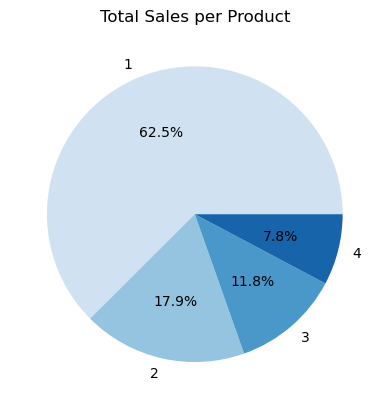

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_per_product = order_items.groupby("product_id")["price_usd"].sum().reset_index(name="sales_revenue")

plt.pie(sales_per_product["sales_revenue"],
        labels=sales_per_product["product_id"].astype(str),
        autopct="%1.1f%%",
        colors=sns.color_palette("Blues", len(sales_per_product)))

plt.title("Total Sales per Product")
plt.show()

- Approximately 62% of total sales come from Product 1, making it the dominant contributor.

- Product 2 generates nearly 18% of overall sales.

- Product 3 accounts for about 12% of total revenue.

- Product 4 contributes the smallest portion, at around 8%.

- This indicates a strong reliance on Product 1, while the other products together represent roughly 38% of total sales.

In [90]:
refund_table["created_at"] = pd.to_datetime(refund_table["created_at"])

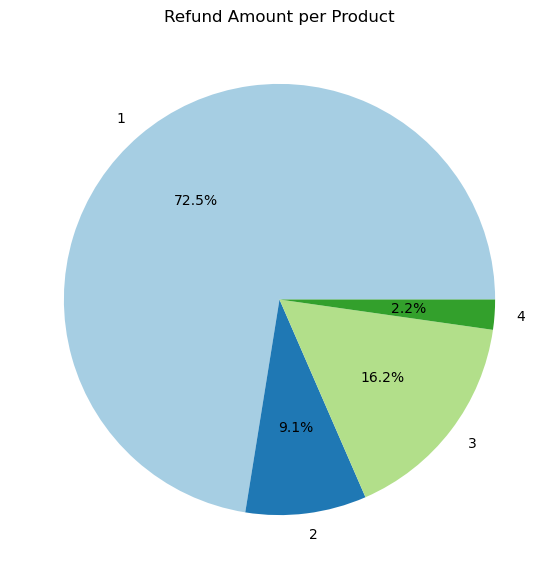

In [103]:
plt.figure(figsize=(7,7))

plt.pie(
    refund_per_product['refund_amount_usd'],
    labels=refund_per_product['product_id'].astype(str),
    autopct='%1.1f%%',
    colors=sns.color_palette("Paired", len(refund_per_product))
)

plt.title("Refund Amount per Product")
plt.show()

- Product 1 records the highest refund amount, contributing approximately 72% of total refunds.

- Product 3 accounts for around 16% of the overall refund value.

- Product 2 contributes nearly 9% of total refunds.

- Product 4 has the lowest refund share, at about 2%.

- The majority of refunds are associated with Product 1, which may suggest potential issues related to product quality or customer satisfaction.

In [91]:
Yearly_Refund_orders = refund_table.groupby(refund_table['created_at'].dt.year).size().reset_index(name="Refunds_per_Year")
Yearly_Refund_orders

,created_at,Refunds_per_Year
0,2012,169
1,2013,339
2,2014,960
3,2015,263


In [92]:
pageviews=pd.read_csv('data/website_pageviews.csv')
pageviews

,website_pageview_id,created_at,website_session_id,pageview_url
0,1,2012-03-19 08:04:16,1,/home
1,2,2012-03-19 08:16:49,2,/home
2,3,2012-03-19 08:26:55,3,/home
3,4,2012-03-19 08:37:33,4,/home
4,5,2012-03-19 09:00:55,5,/home
...,...,...,...,...
1188119,1188120,2015-03-19 07:57:32,472866,/shipping
1188120,1188121,2015-03-19 07:58:13,472870,/the-original-mr-fuzzy
1188121,1188122,2015-03-19 07:59:07,472866,/billing-2
1188122,1188123,2015-03-19 07:59:08,472871,/home


In [93]:
refunds_per_order = (refund_table.groupby("order_id")["refund_amount_usd"].sum().reset_index(name="total_refunded_usd"))
refunds_per_order

,order_id,total_refunded_usd
0,57,49.99
1,71,49.99
2,74,49.99
3,116,49.99
4,118,49.99
...,...,...
1718,32152,49.99
1719,32156,45.99
1720,32191,49.99
1721,32252,45.99


In [94]:
cogs_per_order = (order_items.groupby("order_item_id")["cogs_usd"].sum().reset_index(name="total_cogs_usd"))
cogs_per_order

,order_item_id,total_cogs_usd
0,1,19.49
1,2,19.49
2,3,19.49
3,4,19.49
4,5,19.49
...,...,...
40020,40021,9.49
40021,40022,22.49
40022,40023,9.49
40023,40024,9.49


In [95]:
sessions=pd.read_csv('data/website_sessions.csv')
sessions

,website_session_id,created_at,user_id,is_repeat_session,utm_source,utm_campaign,utm_content,device_type,http_referer
0,1,2012-03-19 08:04:16,1,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
1,2,2012-03-19 08:16:49,2,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
2,3,2012-03-19 08:26:55,3,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
3,4,2012-03-19 08:37:33,4,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com
4,5,2012-03-19 09:00:55,5,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
...,...,...,...,...,...,...,...,...,...
472866,472867,2015-03-19 07:49:25,394314,0,gsearch,brand,g_ad_2,desktop,https://www.gsearch.com
472867,472868,2015-03-19 07:54:36,394315,0,bsearch,nonbrand,b_ad_1,mobile,https://www.bsearch.com
472868,472869,2015-03-19 07:55:40,394316,0,gsearch,nonbrand,g_ad_1,mobile,https://www.gsearch.com
472869,472870,2015-03-19 07:56:29,394317,0,gsearch,nonbrand,g_ad_1,desktop,https://www.gsearch.com


In [96]:
merged= pd.merge(order_items,refund_table,on='order_item_id',how='left')
merged

,order_item_id,created_at_x,order_id_x,product_id,is_primary_item,price_usd,cogs_usd,order_item_refund_id,created_at_y,order_id_y,refund_amount_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49,NaN,NaT,NaN,NaN
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49,NaN,NaT,NaN,NaN
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49,NaN,NaT,NaN,NaN
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49,NaN,NaT,NaN,NaN
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
40020,40021,2015-03-19 04:10:43,32310,4,1,29.99,9.49,NaN,NaT,NaN,NaN
40021,40022,2015-03-19 05:27:28,32311,2,1,59.99,22.49,NaN,NaT,NaN,NaN
40022,40023,2015-03-19 05:27:28,32311,4,0,29.99,9.49,NaN,NaT,NaN,NaN
40023,40024,2015-03-19 05:35:57,32312,4,1,29.99,9.49,NaN,NaT,NaN,NaN


In [97]:
sales_per_product = order_items.groupby('product_id')['price_usd'].sum().reset_index()
sales_per_product.columns = ['product_id', 'sales_revenue']


In [98]:
refund_per_product = merged.groupby('product_id')['refund_amount_usd'].sum().reset_index()

In [99]:
prod_info=pd.merge(sales_per_product,refund_per_product,on='product_id')
prod_info

,product_id,sales_revenue,refund_amount_usd
0,1,1211057.74,61837.63
1,2,347702.04,7738.71
2,3,229260.15,13842.99
3,4,150489.82,1919.36


## Total net revenue

In [101]:
prod_info['net_revenue'].sum()

np.float64(1853171.06)

In [ ]:
prod_info['net_revenue'] = prod_info['sales_revenue'] - prod_info['refund_amount_usd']


C:\Users\Asus\AppData\Local\Temp\ipykernel_16552\4059377519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='Paired')


NameError: name 'mtick' is not defined

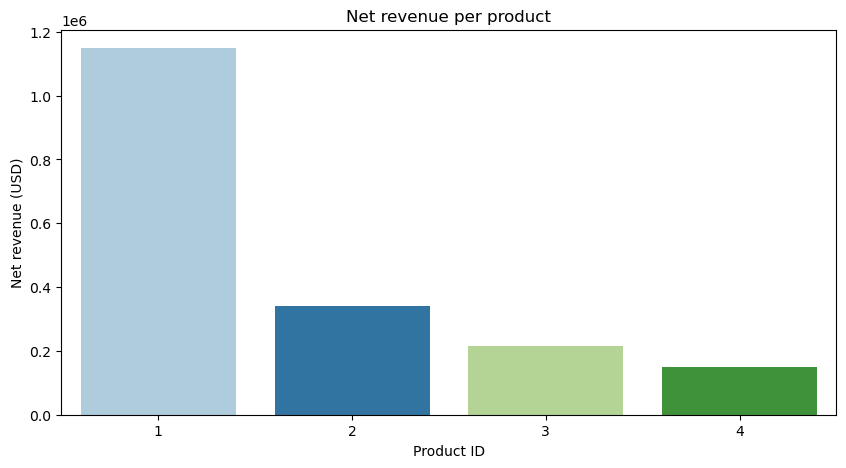

In [102]:
plt.figure(figsize=(10,5))
sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='Paired')
plt.xlabel("Product ID")
plt.ylabel("Net revenue (USD)")
plt.title("Net revenue per product")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

- Product 1 generates the highest net revenue (around $1.15M), clearly leading all products.

- Product 2 earns approximately $0.34M in net revenue.

- Product 3 contributes close to $0.21M.

- Product 4 records the lowest net revenue at about $0.15M.

- There is a substantial revenue gap between Product 1 and the other products.

- Overall, net revenue is heavily concentrated in Product 1, while Products 3 and 4 contribute significantly less.

## Customer Lifecycle Analysis

In [106]:
user_orders = orders.groupby("user_id")["order_id"].count().reset_index()
user_orders.columns = ["user_id", "total_orders"]

In [107]:
user_orders["user_type"] = "New User"
user_orders.loc[user_orders["total_orders"] > 1, "user_type"] = "Repeat User"

In [108]:
user_counts =user_orders["user_type"].value_counts()
user_counts

user_type
New User       31105
Repeat User      591
Name: count, dtype: int64

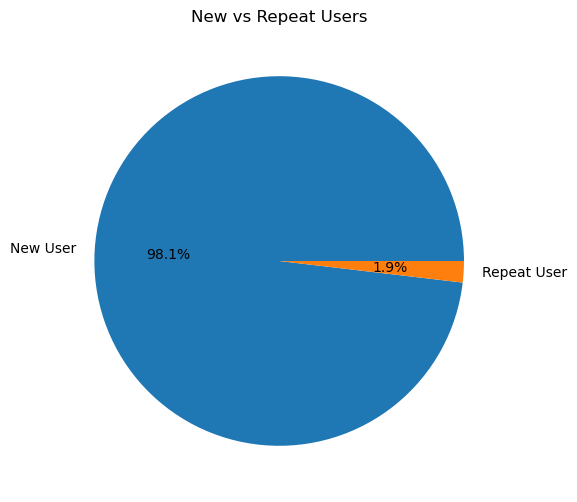

In [109]:
plt.figure(figsize=(6,6))
plt.pie(user_counts.values, labels=user_counts.index, autopct='%1.1f%%')
plt.title("New vs Repeat Users")
plt.show()

- New users account for approximately 98% of the total user base.

- Repeat users represent only about 2% of all users.

- This indicates that while customer acquisition is strong, repeat engagement is very low.

- A significant gap exists between new and returning users.

- The business may need to focus on improving customer retention and strengthening loyalty initiatives.

## Overall Trends

In [110]:
orders["created_at"] = pd.to_datetime(orders["created_at"])

In [111]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [112]:
orders['created_at'].dt.year.unique()

array([2012, 2013, 2014, 2015], dtype=int32)

In [113]:
yearly_orders = orders.groupby(orders['created_at'].dt.year).size().reset_index(name="Sales_per_year")
yearly_orders

,created_at,Sales_per_year
0,2012,2586
1,2013,7447
2,2014,16860
3,2015,5420


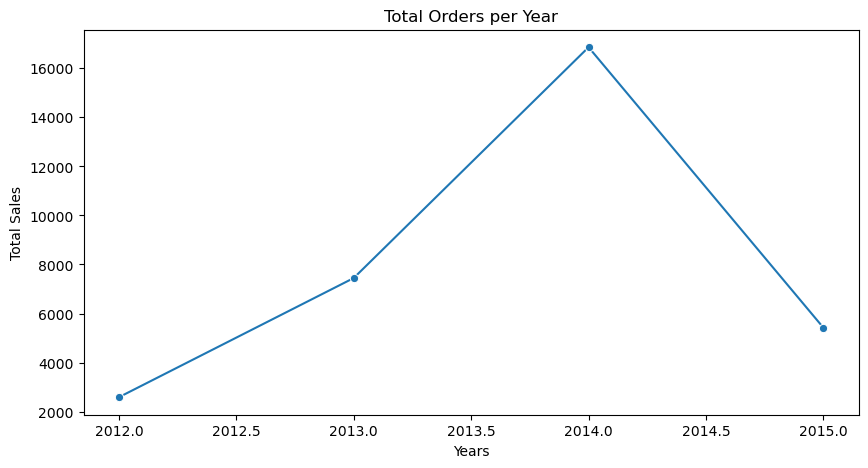

In [114]:
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_orders, x='created_at', y='Sales_per_year', marker='o')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.title("Total Orders per Year")
plt.show()

- Total orders grew from roughly 2,500 in 2012 to about 7,500 in 2013.

- Orders peaked in 2014 at approximately 16,800.

- In 2015, total orders declined significantly to around 5,500.

- This reflects strong growth between 2012 and 2014, followed by a sharp drop in 2015.

- 2014 recorded the highest order volume, while 2012 had the lowest.

In [115]:
Monthly_orders = orders.groupby(orders['created_at'].dt.month).size().reset_index(name="Orders_per_Month")
Monthly_orders

,created_at,Orders_per_Month
0,1,3470
1,2,3587
2,3,2765
3,4,1893
4,5,2047
5,6,1972
6,7,2059
7,8,2161
8,9,2340
9,10,2688


C:\Users\Asus\AppData\Local\Temp\ipykernel_16552\453646576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Monthly_orders,x='created_at',y='Orders_per_Month',palette='mako')


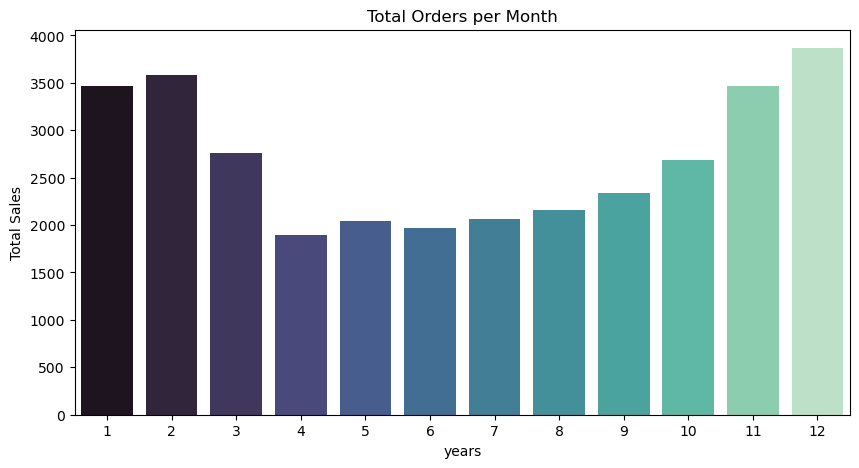

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(data=Monthly_orders,x='created_at',y='Orders_per_Month',palette='mako')
plt.xlabel("years")
plt.ylabel("Total Sales")
plt.title("Total Orders per Month")
plt.show()

- Order volumes are strong at the start of the year, with around 3,500 in January and 3,600 in February.

- Orders decline sharply in April to about 1,900, making it one of the lowest months.

- Between May and August, orders remain relatively steady, ranging from 2,000 to 2,200.

- From September onward, orders begin to rise again (around 2,350).

- December records the highest volume, with approximately 3,900 orders.

- Overall, there is a mid-year dip (April–June) followed by a strong surge in the final quarter (October–December).

In [117]:
weekly_orders = orders.groupby(orders['created_at'].dt.day_name()).size()
weekly_orders

created_at
Friday       5571
Monday       5662
Saturday     2309
Sunday       2538
Thursday     5414
Tuesday      5320
Wednesday    5499
dtype: int64

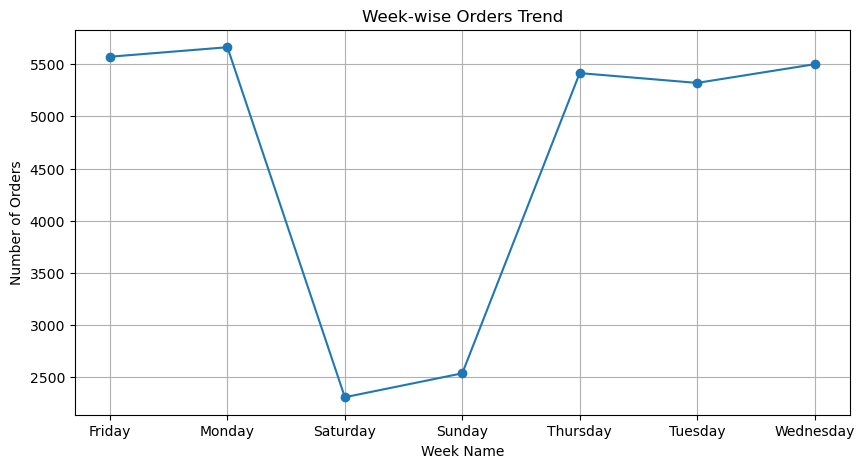

In [118]:
plt.figure(figsize=(10,5))         
plt.plot(weekly_orders, marker='o') 
plt.title("Week-wise Orders Trend")
plt.xlabel("Week Name")
plt.ylabel("Number of Orders")
plt.grid(True)                    
plt.show()

- Monday records the highest number of orders (around 5,650–5,700).
    
- Wednesday and Friday also show strong performance, with over 5,500 orders each.

- Tuesday and Thursday remain steady at approximately 5,300–5,400 orders.

- Saturday has the lowest order volume (around 2,300).

- Sunday performs slightly better than Saturday, with about 2,500 orders.

In [119]:
hourly_orders = orders.groupby(orders['created_at'].dt.hour).size()
hourly_orders

created_at
0      823
1      721
2      586
3      546
4      549
5      566
6      684
7      756
8     1149
9     1661
10    1948
11    2194
12    2172
13    2085
14    2153
15    2188
16    2099
17    1922
18    1593
19    1378
20    1189
21    1192
22    1131
23    1028
dtype: int64

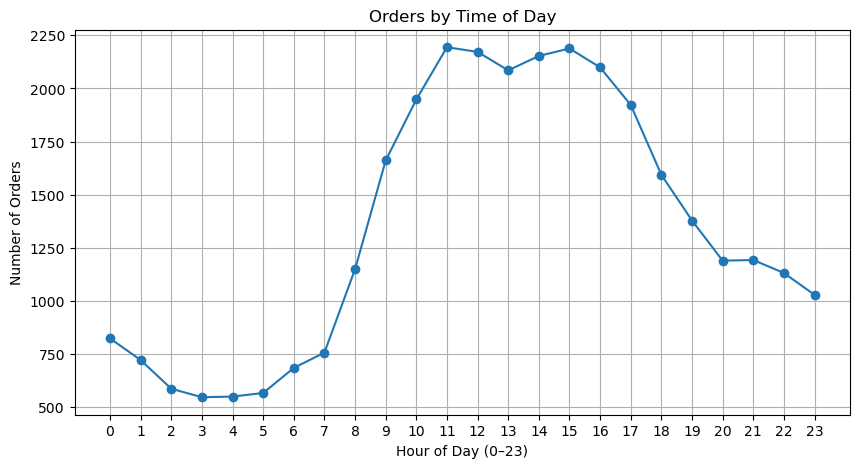

In [120]:
plt.figure(figsize=(10,5))
plt.plot(hourly_orders, marker='o')
plt.title("Orders by Time of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(range(24))
plt.show()

In [45]:
merged['refund_amount_usd'] = merged['refund_amount_usd'].fillna(0)


In [46]:
merged['net_revenue'] = merged['price_usd'] - merged['refund_amount_usd']


In [47]:
merged[['price_usd','refund_amount_usd','net_revenue']].head()


,price_usd,refund_amount_usd,net_revenue
0,49.99,0.0,49.99
1,49.99,0.0,49.99
2,49.99,0.0,49.99
3,49.99,0.0,49.99
4,49.99,0.0,49.99


In [48]:
merged['created_at_x'] = pd.to_datetime(merged['created_at_x'])


In [49]:
monthly_net = merged.groupby(merged['created_at_x'].dt.to_period('M'))['net_revenue'].sum().reset_index()
monthly_net

,created_at_x,net_revenue
0,2012-03,2949.41
1,2012-04,4699.06
2,2012-05,5198.96
3,2012-06,6598.68
4,2012-07,7748.45
5,2012-08,10547.89
6,2012-09,13047.39
7,2012-10,17196.56
8,2012-11,28594.28
9,2012-12,23795.24


In [50]:
monthly_net['created_at_x'] = monthly_net['created_at_x'].astype(str)
fig = px.line(monthly_net, x='created_at_x', y='net_revenue',title='Monthly Net Revenue', markers=True, line_shape='linear')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


In [51]:
yearly_net = merged.groupby(merged['created_at_x'].dt.to_period('Y'))['net_revenue'].sum().reset_index()
yearly_net

,created_at_x,net_revenue
0,2012,120375.92
1,2013,376201.23
2,2014,1027470.04
3,2015,329123.87


In [52]:
yearly_net['created_at_x'] = yearly_net['created_at_x'].astype(str)
fig = px.line(yearly_net, x='created_at_x', y='net_revenue', 
              title='Yearly Net Revenue', markers=True, line_shape='linear')
              
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


In [53]:
weekly_net = merged.groupby(merged['created_at_x'].dt.to_period('W'))['net_revenue'].sum().reset_index()
weekly_net

,created_at_x,net_revenue
0,2012-03-19/2012-03-25,1449.71
1,2012-03-26/2012-04-01,1699.66
2,2012-04-02/2012-04-08,1399.72
3,2012-04-09/2012-04-15,1249.75
4,2012-04-16/2012-04-22,1049.79
...,...,...
152,2015-02-16/2015-02-22,28133.90
153,2015-02-23/2015-03-01,27636.09
154,2015-03-02/2015-03-08,27846.05
155,2015-03-09/2015-03-15,31547.19


In [54]:
weekly_net['created_at_x'] =weekly_net['created_at_x'].astype(str)
fig = px.line(weekly_net, x='created_at_x', y='net_revenue', title='weekly Net Revenue', line_shape='linear')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


In [55]:
merged['created_at_y'] = pd.to_datetime(merged['created_at_y'])

In [56]:
monthly_net = merged.groupby(merged['created_at_y'].dt.to_period('M'))['refund_amount_usd'].sum().reset_index()
monthly_net

,created_at_y,refund_amount_usd
0,2012-04,249.95
1,2012-05,249.95
2,2012-06,249.95
3,2012-07,649.87
4,2012-08,899.82
5,2012-09,1049.79
6,2012-10,1199.76
7,2012-11,1999.60
8,2012-12,1899.62
9,2013-01,1059.79


In [57]:
monthly_net['created_at_y'] = monthly_net['created_at_y'].astype(str)
fig = px.line(monthly_net, x='created_at_y', y='refund_amount_usd',title='Monthly Refund', markers=True, line_shape='linear')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


In [58]:
yearly_ref = merged.groupby(merged['created_at_y'].dt.to_period('Y'))['refund_amount_usd'].sum().reset_index()
yearly_ref

,created_at_y,refund_amount_usd
0,2012,8448.31
1,2013,17202.61
2,2014,46952.40
3,2015,12735.37


In [60]:
weekly_ref = merged.groupby(merged['created_at_y'].dt.to_period('W'))['refund_amount_usd'].sum().reset_index()
weekly_ref

,created_at_y,refund_amount_usd
0,2012-04-02/2012-04-08,49.99
1,2012-04-09/2012-04-15,99.98
2,2012-04-16/2012-04-22,99.98
3,2012-04-30/2012-05-06,49.99
4,2012-05-07/2012-05-13,49.99
...,...,...
150,2015-03-02/2015-03-08,1055.77
151,2015-03-09/2015-03-15,1013.78
152,2015-03-16/2015-03-22,1117.77
153,2015-03-23/2015-03-29,443.91


In [61]:
weekly_ref['created_at_y'] =weekly_ref['created_at_y'].astype(str)
fig = px.line(weekly_ref, x='created_at_y', y='refund_amount_usd', title='weekly Refund', line_shape='linear')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()

In [62]:
product_sales =order_items.groupby("product_id").size().reset_index(name="total_units_sold").sort_values("total_units_sold", ascending=False)
product_sales

,product_id,total_units_sold
0,1,24226
1,2,5796
3,4,5018
2,3,4985


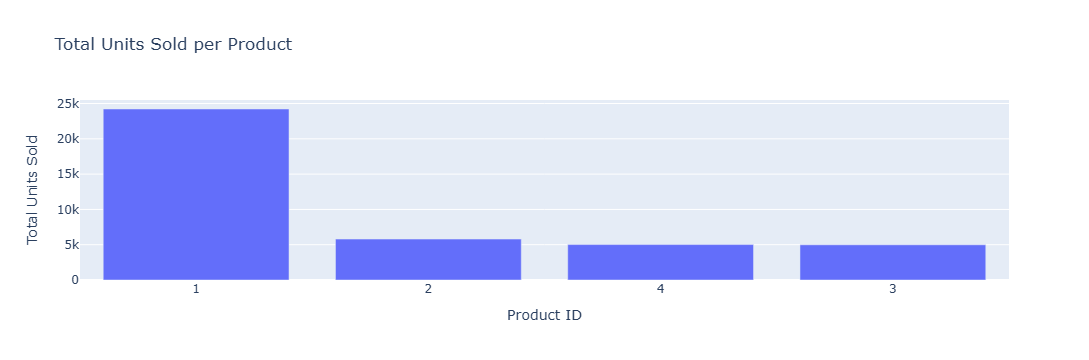

In [63]:
import plotly.express as px

fig = px.bar(
    product_sales,
    x=product_sales["product_id"].astype(str),
    y="total_units_sold",
    title="Total Units Sold per Product",
    labels={
        "x": "Product ID",
        "total_units_sold": "Total Units Sold"
    },
    color_discrete_sequence=["Light Blue"]   
)

fig.show()


## Refunds Merged with Order Items

In [64]:
refunds_items = pd.merge( refund_table, order_items, on="order_item_id")
refunds_items

,order_item_refund_id,created_at_x,order_item_id,order_id_x,refund_amount_usd,created_at_y,order_id_y,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-04-06 11:32:43,57,57,49.99,2012-03-31 02:32:43,57,1,1,49.99,19.49
1,2,2012-04-13 01:09:43,74,74,49.99,2012-04-03 19:09:43,74,1,1,49.99,19.49
2,3,2012-04-15 07:03:48,71,71,49.99,2012-04-03 15:03:48,71,1,1,49.99,19.49
3,4,2012-04-17 20:00:37,118,118,49.99,2012-04-15 09:00:37,118,1,1,49.99,19.49
4,5,2012-04-22 20:53:49,116,116,49.99,2012-04-13 14:53:49,116,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...,...,...,...
1726,1727,2015-03-30 09:37:23,39950,32255,59.99,2015-03-18 10:37:23,32255,2,1,59.99,22.49
1727,1728,2015-03-30 21:33:51,39671,32049,49.99,2015-03-15 15:33:51,32049,1,1,49.99,19.49
1728,1729,2015-03-31 19:59:48,39729,32090,49.99,2015-03-16 10:59:48,32090,1,1,49.99,19.49
1729,1730,2015-04-01 03:54:48,39717,32079,59.99,2015-03-16 08:54:48,32079,2,0,59.99,22.49


In [65]:
refund_counts = refunds_items.groupby('product_id')['order_item_id'].count().reset_index()
refund_counts.columns = ['product_id', 'total_refunds']


In [66]:
prod_refund = pd.merge( refund_counts, product_sales, on="product_id")
prod_refund

,product_id,total_refunds,total_units_sold
0,1,1237,24226
1,2,129,5796
2,3,301,4985
3,4,64,5018


In [67]:
prod_refund["refund_rate_%"]=(prod_refund['total_refunds']/prod_refund['total_units_sold'])*100

In [68]:
prod_refund

,product_id,total_refunds,total_units_sold,refund_rate_%
0,1,1237,24226,5.106084
1,2,129,5796,2.225673
2,3,301,4985,6.038114
3,4,64,5018,1.275409


In [69]:
monthly_trends = merged.groupby(merged['created_at_x'].dt.to_period('M')).agg(
    total_revenue = ('net_revenue', 'sum'),
    total_refunds = ('refund_amount_usd', 'sum'),
    total_orders = ('order_id_x', 'nunique')
).reset_index()

monthly_trends['created_at_x'] = monthly_trends['created_at_x'].astype(str)

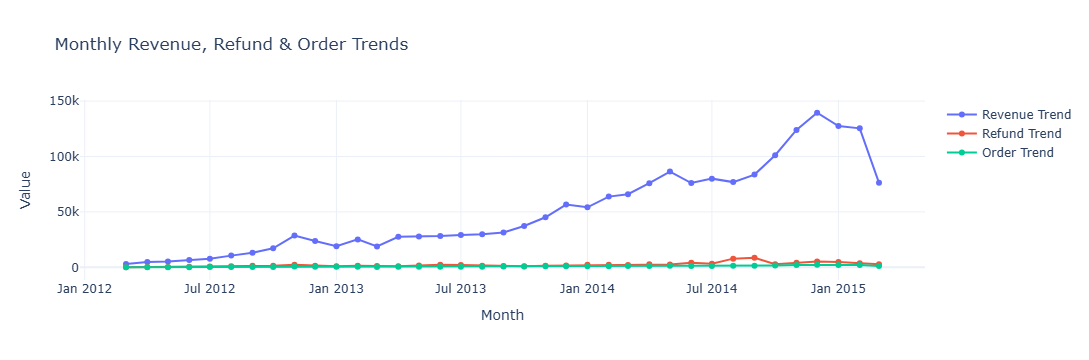

In [70]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_trends['created_at_x'],
    y=monthly_trends['total_revenue'],
    mode='lines+markers',
    name='Revenue Trend'
))

fig.add_trace(go.Scatter(
    x=monthly_trends['created_at_x'],
    y=monthly_trends['total_refunds'],
    mode='lines+markers',
    name='Refund Trend'
))

fig.add_trace(go.Scatter(
    x=monthly_trends['created_at_x'],
    y=monthly_trends['total_orders'],
    mode='lines+markers',
    name='Order Trend'
))

fig.update_layout(
    title="Monthly Revenue, Refund & Order Trends",
    xaxis_title="Month",
    yaxis_title="Value",
    template="plotly_white"
)

fig.show()

In [71]:
merged['created_at_x'] = pd.to_datetime(merged['created_at_x'])
merged['month'] = merged['created_at_x'].dt.to_period('M').astype(str)

merged['is_refunded'] = merged['refund_amount_usd'].notna().astype(int)

monthly_product = merged.groupby(['month','product_id']).agg(
    total_units_sold = ('order_item_id','count'),
    total_refunds = ('is_refunded','sum')
).reset_index()

monthly_product['refund_rate_%'] = (
    monthly_product['total_refunds'] / monthly_product['total_units_sold']
) * 100

In [72]:
heatmap_data = monthly_product.pivot(
    index='product_id',
    columns='month',
    values='refund_rate_%'
)

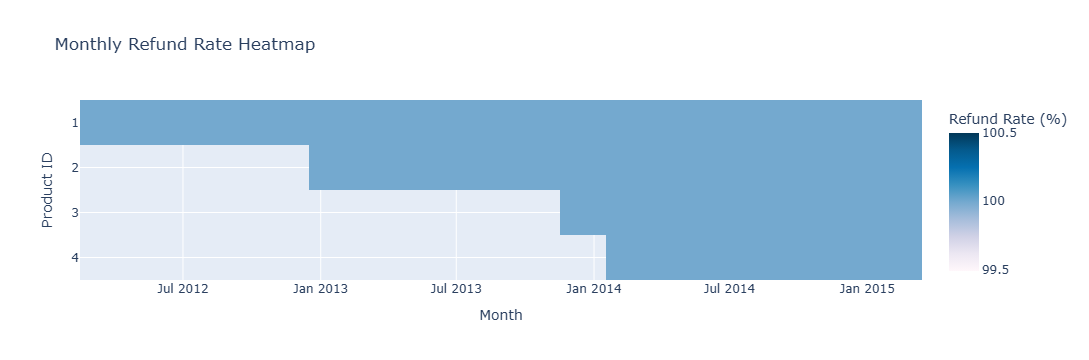

In [73]:
fig = px.imshow(
    heatmap_data,
    aspect="auto",
    color_continuous_scale="PuBu",
    labels=dict(
        x="Month",
        y="Product ID",
        color="Refund Rate (%)"
    ),
    title="Monthly Refund Rate Heatmap"
)

fig.update_layout(
    xaxis_nticks=12
)

fig.show()

In [75]:
# Ensure datetime
orders['created_at'] = pd.to_datetime(orders['created_at'])
order_items['created_at'] = pd.to_datetime(order_items['created_at'])
refund_table['created_at'] = pd.to_datetime(refund_table['created_at'])

# Create month column
orders['month'] = orders['created_at'].dt.to_period('M').astype(str)
order_items['month'] = order_items['created_at'].dt.to_period('M').astype(str)
refund_table['month'] = refund_table['created_at'].dt.to_period('M').astype(str)

# Monthly Revenue (from order_items)
revenue_trend = (
    order_items.groupby('month')['price_usd']
    .sum()
    .reset_index(name='revenue')
)

# Monthly Orders Count (from orders)
orders_trend = (
    orders.groupby('month')
    .size()
    .reset_index(name='orders_count')
)

# Monthly Refund Amount
refund_trend = (
    refund_table.groupby('month')['refund_amount_usd']
    .sum()
    .reset_index(name='refund_amount')
)

# Merge all trends
trend = (
    revenue_trend
    .merge(orders_trend, on='month', how='left')
    .merge(refund_trend, on='month', how='left')
    .fillna(0)
)

# Sort by month
trend = trend.sort_values('month')

trend.head()


,month,revenue,orders_count,refund_amount
0,2012-03,2999.40,60,0.00
1,2012-04,4949.01,99,249.95
2,2012-05,5398.92,108,249.95
3,2012-06,6998.60,140,249.95
4,2012-07,8448.31,169,649.87


In [77]:
heat = rate.pivot(
    index='product_id',
    columns='month',
    values='refund_pct'
).fillna(0)

fig2 = px.imshow(
    heat,
    text_auto=".1f",
    color_continuous_scale='Blues',
    aspect='auto',
    title='Refund % per Product per Month'
)

fig2.update_layout(
    xaxis_title='Month',
    yaxis_title='Product ID'
)

fig2.show()


In [104]:
import pandas as pd

df = order_items[['order_id','product_id']].merge(
        orders[['order_id','user_id','created_at']],
        on='order_id')

df['created_at'] = pd.to_datetime(df['created_at'])

df = df.sort_values(['user_id','product_id','created_at'])
df['purchase_number'] = df.groupby(['user_id','product_id']).cumcount()+1
df['purchase_type'] = df['purchase_number'].eq(1).map({True:'First Purchase', False:'Repeat Purchase'})

display(df)
display(df[df['purchase_type']=='Repeat Purchase'])
display(df['purchase_type'].value_counts().reset_index())

,order_id,product_id,user_id,created_at,purchase_number,purchase_type
151,152,1,13,2012-04-25 21:05:32,1,First Purchase
0,1,1,20,2012-03-19 10:42:46,1,First Purchase
131,132,1,59,2012-04-19 07:42:08,1,First Purchase
1,2,1,104,2012-03-19 19:27:37,1,First Purchase
2,3,1,147,2012-03-20 06:44:45,1,First Purchase
...,...,...,...,...,...,...
40019,32309,1,394255,2015-03-19 03:58:12,1,First Purchase
40020,32310,4,394257,2015-03-19 04:10:43,1,First Purchase
40021,32311,2,394268,2015-03-19 05:27:28,1,First Purchase
40022,32311,4,394268,2015-03-19 05:27:28,1,First Purchase


,order_id,product_id,user_id,created_at,purchase_number,purchase_type
386,387,1,3561,2012-06-26 21:13:49,2,Repeat Purchase
499,500,1,11071,2012-07-19 17:43:50,2,Repeat Purchase
750,751,1,16442,2012-08-24 13:08:47,2,Repeat Purchase
1063,1064,1,18996,2012-09-27 10:28:01,2,Repeat Purchase
1527,1528,1,22180,2012-11-06 15:20:39,2,Repeat Purchase
...,...,...,...,...,...,...
39491,31919,1,373342,2015-03-13 01:35:08,2,Repeat Purchase
39734,32094,4,373747,2015-03-16 11:46:33,2,Repeat Purchase
38299,31032,1,375224,2015-02-28 11:18:00,2,Repeat Purchase
38954,31527,4,376179,2015-03-08 11:45:11,2,Repeat Purchase


,purchase_type,count
0,First Purchase,39602
1,Repeat Purchase,423
